In [1]:
import sys, os
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation
import glob
import pickle
hostname = os.uname()

In [2]:
data_path = "./PickledData/*"

print(f"ls of {data_path}:")
print(sorted(glob.glob(data_path)))

ls of ./PickledData/*:
['./PickledData/DoSpaceTrigger_Data_Batchb01_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb02_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb03_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb04_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb05_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb06_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb07_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb08_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb09_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb10_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb11_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb12_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb13_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb14_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb15_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb16_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb17_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb18_low.pkl', './P

In [3]:
data_path = "./PickledData/*"
all_files = sorted(glob.glob(data_path))


# if len(all_files) == 0:
#     print("No files found in the current data path, trying alternative paths...")
#     if 'tycho' in hostname or 'tycho' in hostname.nodename:
#         data_path = "/remote/tychodata/ftairli/data/CDE/SpaceTriggerPickles/*"
#     if 'tedtop' in hostname:
#         data_path = "/home/fedor-tairli/work/CDEs/Data/Processed/CDE_100_Isolation_PickledData/*"
#     all_files = sorted(glob.glob(data_path))

print(f'Found {len(all_files)} files')
print(all_files)
print(all_files[0])


Found 45 files
['./PickledData/DoSpaceTrigger_Data_Batchb01_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb02_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb03_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb04_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb05_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb06_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb07_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb08_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb09_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb10_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb11_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb12_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb13_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb14_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb15_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb16_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb17_low.pkl', './PickledData/DoSpaceTrigger_Data_Batchb18_low.pkl', './PickledDa

In [4]:
with open(all_files[0], 'rb') as f:
    data = pickle.load(f)
    print('Event Keys')
    print(data[0].keys())
    print('PixelData Keys')
    print(data[0]['PixelData'].keys())

Event Keys
dict_keys(['Batch', 'Shower', 'EyeID', 'Gen_LogE', 'Gen_CosZen', 'Gen_Xmax', 'Gen_SDPPhi', 'Gen_SDPTheta', 'Gen_Chi0', 'Gen_Rp', 'Gen_T0', 'Gen_CoreEyeDist', 'Gen_CherenkovFraction', 'Gen_Primary', 'EventClass', 'TotalPixels', 'PixelData', 'MyyTrigger'])
PixelData Keys
dict_keys(['PixelID', 'Status', 'Theta', 'Phi', 'Trace', 'RecTrigger'])


In [5]:
Pixel_Signal_Threshold = 10000 # in Photons / timebin / pixel

Data = []

for file in all_files:
    # print(f"Loading {file}")
    with open(file, 'rb') as f:
        data = pickle.load(f)
    N_Events_in_File = len(data)
    N_Events_Passed  = 0
    # Check the threshold on per-event Basis
    
    for Event in data:
        Pixel_Traces = Event['PixelData']['Trace']
        if np.any(Pixel_Traces > Pixel_Signal_Threshold):
            Data.append(Event)
            N_Events_Passed += 1
    print(f"File {file}: {N_Events_Passed} / {N_Events_in_File} events passed the threshold cut")
    print()




File ./PickledData/DoSpaceTrigger_Data_Batchb01_low.pkl: 111 / 3495 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb02_low.pkl: 124 / 3462 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb03_low.pkl: 116 / 3512 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb04_low.pkl: 125 / 3445 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb05_low.pkl: 108 / 3382 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb06_low.pkl: 126 / 3561 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb07_low.pkl: 119 / 3469 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb08_low.pkl: 107 / 3505 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb09_low.pkl: 107 / 3463 events passed the threshold cut

File ./PickledData/DoSpaceTrigger_Data_Batchb10_low.pkl: 95 / 3392 events passed the thresh

In [71]:
# Processing_Functions

def Gradient_and_GOF(x,y,w):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_var  = np.var(x)

    m = np.sum(w*(x - x_mean)*(y - y_mean)) / np.sum(w) / x_var

    t = y_mean - m*x_mean

    chi_squared = np.sum(w*(y - (m*x + t))**2) / np.sum(w)

    return m,chi_squared




from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

def Calculate_Hillas_Values(Event):
    # Info
    Possible_Telscope_OA_Phis = np.array([44.45,89.87,132.83])
    Possible_Telescope_OA_Thetas = np.array([45,45,45])

    Pixel_Data = Event['PixelData']
    Triggered_Mask = Event['MyyTrigger'].sum(axis=1)>0  


    Pixel_Amplitudes = np.sum(Pixel_Data['Trace']*Event['MyyTrigger'], axis=1).astype(float)

    pix_X_Cam = Pixel_Data['Phi']
    pix_Y_Cam = Pixel_Data['Theta']

    pix_X_Cam_Mean = np.mean(pix_X_Cam*Pixel_Amplitudes) / np.mean(Pixel_Amplitudes)
    pix_Y_Cam_Mean = np.mean(pix_Y_Cam*Pixel_Amplitudes) / np.mean(Pixel_Amplitudes)

    # Transfrom the pix_X,Y_Cam to pix_X,Y
    # Minimise the spread in Y
    # X = cos(alpha)*(X_Cam - X_Cam_Mean) - sin(alpha)*(Y_Cam - Y_Cam_Mean)
    # Y = sin(alpha)*(X_Cam - X_Cam_Mean) + cos(alpha)*(Y_Cam - Y_Cam_Mean)


    def Y_Spread(alpha):
        Y = np.sin(alpha)*(pix_X_Cam - pix_X_Cam_Mean) + np.cos(alpha)*(pix_Y_Cam - pix_Y_Cam_Mean)
        spread = np.sum(Pixel_Amplitudes*(Y)**2) / np.sum(Pixel_Amplitudes)
        return spread
    
    res = minimize_scalar(Y_Spread, bounds=[0,2*np.pi], method='bounded')
    alpha = res.x
    # res = minimize(Y_Spread, bounds=[(-2 * np.pi, 2 * np.pi)], method='L-BFGS-B')
    # alpha = res.x[0]
    

    X = np.cos(alpha)*(pix_X_Cam - pix_X_Cam_Mean) - np.sin(alpha)*(pix_Y_Cam - pix_Y_Cam_Mean)
    Y = np.sin(alpha)*(pix_X_Cam - pix_X_Cam_Mean) + np.cos(alpha)*(pix_Y_Cam - pix_Y_Cam_Mean)

    # 1
    H_Amplitude = np.sum(Pixel_Amplitudes)

    # 2
    H_Npix = np.sum(Pixel_Amplitudes > 0)

    # 3
    H_Distance = np.min(np.sqrt((pix_X_Cam_Mean-Possible_Telscope_OA_Phis)**2 + (pix_Y_Cam_Mean-Possible_Telescope_OA_Thetas)**2))

    # 4 
    H_Width = np.sqrt(np.sum(Pixel_Amplitudes*(Y)**2) / H_Amplitude)

    # 5
    H_Length = np.sqrt(np.sum(Pixel_Amplitudes*(X)**2) / H_Amplitude)

    # 6
    H_Skewness = np.sum(Pixel_Amplitudes*(X)**3) / H_Amplitude / H_Length**3

    # 7
    H_Kurtosis = np.sum(Pixel_Amplitudes*(X)**4) / H_Amplitude / H_Length**4

    # Composite Values

    # 8
    r = np.sqrt((X/H_Length)**2 + (Y/H_Width)**2)
    H_Grad_Profile, H_GOF_Profile = Gradient_and_GOF(r, np.log10(np.clip(Pixel_Amplitudes,a_min = 1, a_max = np.inf)), Pixel_Amplitudes)


    # 9 - Time Profiles    
    
    # Calculate Pixel Centroids here
    Centroids = np.sum(Pixel_Data['Trace']*Event['MyyTrigger']*np.arange(Pixel_Data['Trace'].shape[1]), axis=1) / np.sum(Pixel_Data['Trace']*Event['MyyTrigger'], axis=1)
    Centroids = Centroids[Triggered_Mask]
    Centroids -= np.min(Centroids)
    # print(Triggered_Mask)
    # print(Centroids)

    H_Grad_Time_Major, H_GOF_Time_Major = Gradient_and_GOF(X[Triggered_Mask], Centroids, Pixel_Amplitudes[Triggered_Mask])
    H_Grad_Time_Minor, H_GOF_Time_Minor = Gradient_and_GOF(Y[Triggered_Mask], Centroids, Pixel_Amplitudes[Triggered_Mask])

    Hillas_Values = {   "H_Amplitude": H_Amplitude,
                        "H_Npix"     : H_Npix,
                        "H_Distance" : H_Distance,
                        "H_Width"    : H_Width,
                        "H_Length"   : H_Length,
                        "H_Skewness" : H_Skewness,
                        "H_Kurtosis" : H_Kurtosis,
                        "H_Grad_Profile"    : H_Grad_Profile,
                        "H_GOF_Profile"     : H_GOF_Profile,
                        "H_Grad_Time_Major" : H_Grad_Time_Major,
                        "H_GOF_Time_Major"  : H_GOF_Time_Major,
                        "H_Grad_Time_Minor" : H_Grad_Time_Minor,
                        "H_GOF_Time_Minor"  : H_GOF_Time_Minor,
                        # "Triggered"         : Triggered_Mask,
                        "H_alpha"           : alpha,
                        }

    Event['HillasValues'] = Hillas_Values

In [100]:
Data[123]['PixelData']['Trace'].shape   

(116, 1999)

In [72]:
N_Events = len(Data)
for i,event in enumerate(Data):
    if i % 100 == 0:
        print(f"Processing event {i} / {N_Events}")
    Calculate_Hillas_Values(event)
    # break

Processing event 0 / 5108


/tmp/ipykernel_14075/3574736321.py:90: RuntimeWarning: invalid value encountered in divide
  Centroids = np.sum(Pixel_Data['Trace']*Event['MyyTrigger']*np.arange(Pixel_Data['Trace'].shape[1]), axis=1) / np.sum(Pixel_Data['Trace']*Event['MyyTrigger'], axis=1)


Processing event 100 / 5108
Processing event 200 / 5108
Processing event 300 / 5108
Processing event 400 / 5108
Processing event 500 / 5108
Processing event 600 / 5108
Processing event 700 / 5108


/tmp/ipykernel_14075/3574736321.py:75: RuntimeWarning: invalid value encountered in double_scalars
  H_Skewness = np.sum(Pixel_Amplitudes*(X)**3) / H_Amplitude / H_Length**3
/tmp/ipykernel_14075/3574736321.py:78: RuntimeWarning: invalid value encountered in double_scalars
  H_Kurtosis = np.sum(Pixel_Amplitudes*(X)**4) / H_Amplitude / H_Length**4
/tmp/ipykernel_14075/3574736321.py:83: RuntimeWarning: divide by zero encountered in divide
  r = np.sqrt((X/H_Length)**2 + (Y/H_Width)**2)
/tmp/ipykernel_14075/3574736321.py:83: RuntimeWarning: invalid value encountered in divide
  r = np.sqrt((X/H_Length)**2 + (Y/H_Width)**2)
/tmp/ipykernel_14075/3574736321.py:8: RuntimeWarning: invalid value encountered in double_scalars
  m = np.sum(w*(x - x_mean)*(y - y_mean)) / np.sum(w) / x_var


Processing event 800 / 5108


/remote/tychodata/ftairli/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_14075/3574736321.py:36: RuntimeWarning: invalid value encountered in double_scalars
  pix_X_Cam_Mean = np.mean(pix_X_Cam*Pixel_Amplitudes) / np.mean(Pixel_Amplitudes)
/tmp/ipykernel_14075/3574736321.py:37: RuntimeWarning: invalid value encountered in double_scalars
  pix_Y_Cam_Mean = np.mean(pix_Y_Cam*Pixel_Amplitudes) / np.mean(Pixel_Amplitudes)
/tmp/ipykernel_14075/3574736321.py:8: RuntimeWarning: invalid value encountered in subtract
  m = np.sum(w*(x - x_mean)*(y - y_mean)) / np.sum(w) / x_var


Processing event 900 / 5108
Processing event 1000 / 5108
Processing event 1100 / 5108
Processing event 1200 / 5108
Processing event 1300 / 5108
Processing event 1400 / 5108
Processing event 1500 / 5108
Processing event 1600 / 5108
Processing event 1700 / 5108
Processing event 1800 / 5108
Processing event 1900 / 5108
Processing event 2000 / 5108
Processing event 2100 / 5108
Processing event 2200 / 5108
Processing event 2300 / 5108
Processing event 2400 / 5108
Processing event 2500 / 5108
Processing event 2600 / 5108
Processing event 2700 / 5108
Processing event 2800 / 5108
Processing event 2900 / 5108
Processing event 3000 / 5108
Processing event 3100 / 5108
Processing event 3200 / 5108
Processing event 3300 / 5108
Processing event 3400 / 5108
Processing event 3500 / 5108
Processing event 3600 / 5108
Processing event 3700 / 5108
Processing event 3800 / 5108
Processing event 3900 / 5108
Processing event 4000 / 5108
Processing event 4100 / 5108
Processing event 4200 / 5108
Processing even

#### Plot simple histograms of the Hillas Parameters for the Saturation Threshold Events

In [73]:
# Collect Data Here
All_H_Amplitude = np.array([Event['HillasValues']['H_Amplitude'] for Event in Data])
All_H_Distance  = np.array([Event['HillasValues']['H_Distance']  for Event in Data])
All_H_Width     = np.array([Event['HillasValues']['H_Width']     for Event in Data])
All_H_Length    = np.array([Event['HillasValues']['H_Length']    for Event in Data])
All_H_Skewness  = np.array([Event['HillasValues']['H_Skewness']  for Event in Data])
All_H_Kurtosis  = np.array([Event['HillasValues']['H_Kurtosis']  for Event in Data])
All_H_GOF_Profile = np.array([Event['HillasValues']['H_GOF_Profile']         for Event in Data])
All_H_Grad_Profile = np.array([Event['HillasValues']['H_Grad_Profile']       for Event in Data])
All_H_GOF_Time_Major = np.array([Event['HillasValues']['H_GOF_Time_Major']   for Event in Data])
All_H_Grad_Time_Major = np.array([Event['HillasValues']['H_Grad_Time_Major'] for Event in Data])
All_H_GOF_Time_Minor = np.array([Event['HillasValues']['H_GOF_Time_Minor']   for Event in Data])
All_H_Grad_Time_Minor = np.array([Event['HillasValues']['H_Grad_Time_Minor'] for Event in Data])
All_H_Npix      = np.array([Event['HillasValues']['H_Npix']      for Event in Data])
All_H_alpha     = np.array([Event['HillasValues']['H_alpha']     for Event in Data])

# Descriptive Parameters

All_GenLogE    = np.array([Event['Gen_LogE']   for Event in Data])
All_GenCosZen  = np.array([Event['Gen_CosZen'] for Event in Data])
All_GenXmax    = np.array([Event['Gen_Xmax']   for Event in Data])
All_GenSDPTheta = np.array([Event['Gen_SDPTheta'] for Event in Data])
All_GenSDPPhi   = np.array([Event['Gen_SDPPhi']   for Event in Data])
All_GenChi0     = np.array([Event['Gen_Chi0']     for Event in Data])
All_GenCherenkovFraction = np.array([Event['Gen_CherenkovFraction'] for Event in Data])
All_GenPrimary = np.array([Event['Gen_Primary'] for Event in Data])
All_EventClass = np.array([Event['EventClass'] for Event in Data])


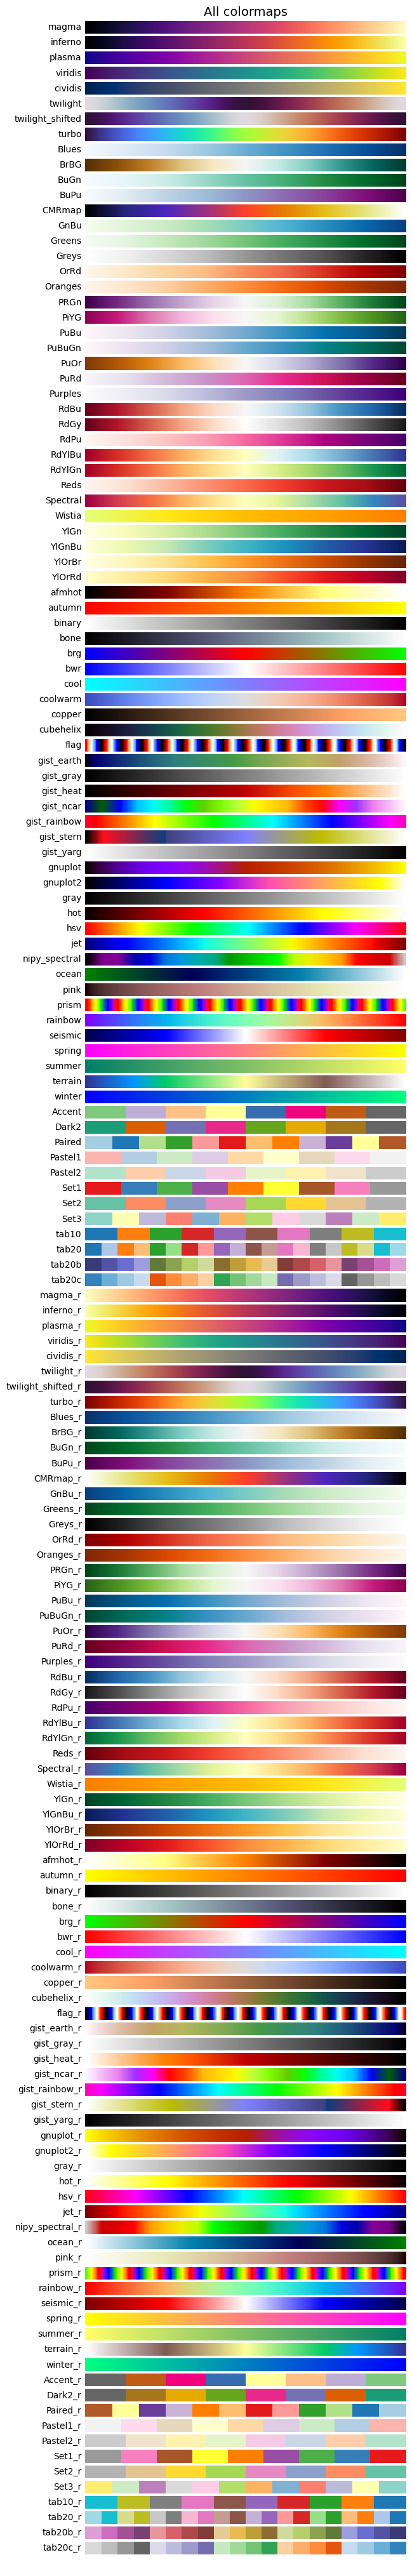

In [95]:
cmaps = {}
import matplotlib as mpl
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('All',mpl.colormaps)

In [99]:
# First, lets plot the distributions of the Hillas parameters
All_H_Values = {"Amplitude": All_H_Amplitude,
                "Distance" : All_H_Distance,
                "Width"    : All_H_Width,
                "Length"   : All_H_Length,
                "Skewness" : All_H_Skewness,
                "Kurtosis" : All_H_Kurtosis,
                "GOF_Profile" : All_H_GOF_Profile,
                "Grad_Profile": All_H_Grad_Profile,
                "GOF_Time_Major" : All_H_GOF_Time_Major,
                "Grad_Time_Major": All_H_Grad_Time_Major,
                "GOF_Time_Minor" : All_H_GOF_Time_Minor,
                "Grad_Time_Minor": All_H_Grad_Time_Minor,
                "Npix"     : All_H_Npix,
                "alpha"    : All_H_alpha
                }



All_Desc_Values = {"GenLogE"   : All_GenLogE,
                     "GenCosZen" : All_GenCosZen,
                     "GenXmax"   : All_GenXmax,
                     "GenSDPTheta": All_GenSDPTheta,
                     "GenSDPPhi"  : All_GenSDPPhi,
                     "GenChi0"    : All_GenChi0,
                     "GenCherenkovFraction": All_GenCherenkovFraction
                 }

from matplotlib import cm
All_Desc_Values_CMAPS = {"GenLogE"   : cm.Purples,
                         "GenCosZen" : cm.Blues  ,
                         "GenXmax"   : cm.Greens ,
                         "GenSDPTheta": cm.Oranges,
                         "GenSDPPhi"  : cm.Oranges,
                         "GenChi0"    : cm.Reds   ,
                         "GenCherenkovFraction": cm.BuPu
                          }

All_H_Values_limits = {"GOF_Time_Major": [0,10],
                       "Grad_Time_Major": [-1,1],
                       "GOF_Time_Minor": [0,10],
                        "Grad_Time_Minor": [-1,1],
                         }


fig, ax = plt.subplots(len(All_H_Values)+1,8, figsize=[80,10*len(All_H_Values)])

for v,value in enumerate(All_H_Values.keys()):

    X = All_H_Values[value]
    if value in All_H_Values_limits:
        limits = All_H_Values_limits[value]
        X_Finite_Mask = (X > limits[0]) & (X < limits[1]) & np.isfinite(X)
    else:
        X_Finite_Mask = np.isfinite(X)
    
    X = X[X_Finite_Mask]

    # plt.suptitle(f"Distribution of Hillas {value}")
    ax[v+1,0].hist(X, bins=50, density=True, orientation='horizontal')
    
    ax[v+1,0].set_ylabel(value)
    ax[v+1,0].set_xlabel("Density")
    # ax[v+1,0].set_xscale('log')
    ax[v+1,0].grid()
    ax[v+1,0].invert_xaxis()



    for i, (desc_name, desc_value) in enumerate(All_Desc_Values.items()):
        desc_value = desc_value[X_Finite_Mask]
        ax[v+1,i+1].hist2d(desc_value, X, bins=50, density=True, cmap=All_Desc_Values_CMAPS[desc_name])
        ax[v+1,i+1].set_xlabel(desc_name)
        # ax[v+1,i+1].set_ylabel(value)
        # ax[v+1,i+1].grid()

for i, (desc_name, desc_value) in enumerate(All_Desc_Values.items()):
    ax[0,i+1].hist(desc_value, bins=50, density=True,color=All_Desc_Values_CMAPS[desc_name](0.75))
    ax[0,i+1].set_xlabel(desc_name)
    ax[0,i+1].set_ylabel("Density")
    # ax[0,i+1].set_yscale('log')
    ax[0,i+1].grid()

ax[0,0].axis('off')

plt.tight_layout()


plt.savefig(f"Hillas_Parameters_Distribution.png")
# plt.show()
    # plt.close()
    

/tmp/ipykernel_14075/326268661.py:21: RuntimeWarning: invalid value encountered in divide
  plt.scatter(Y/X,Z, s=2, c='black', alpha=0.5)


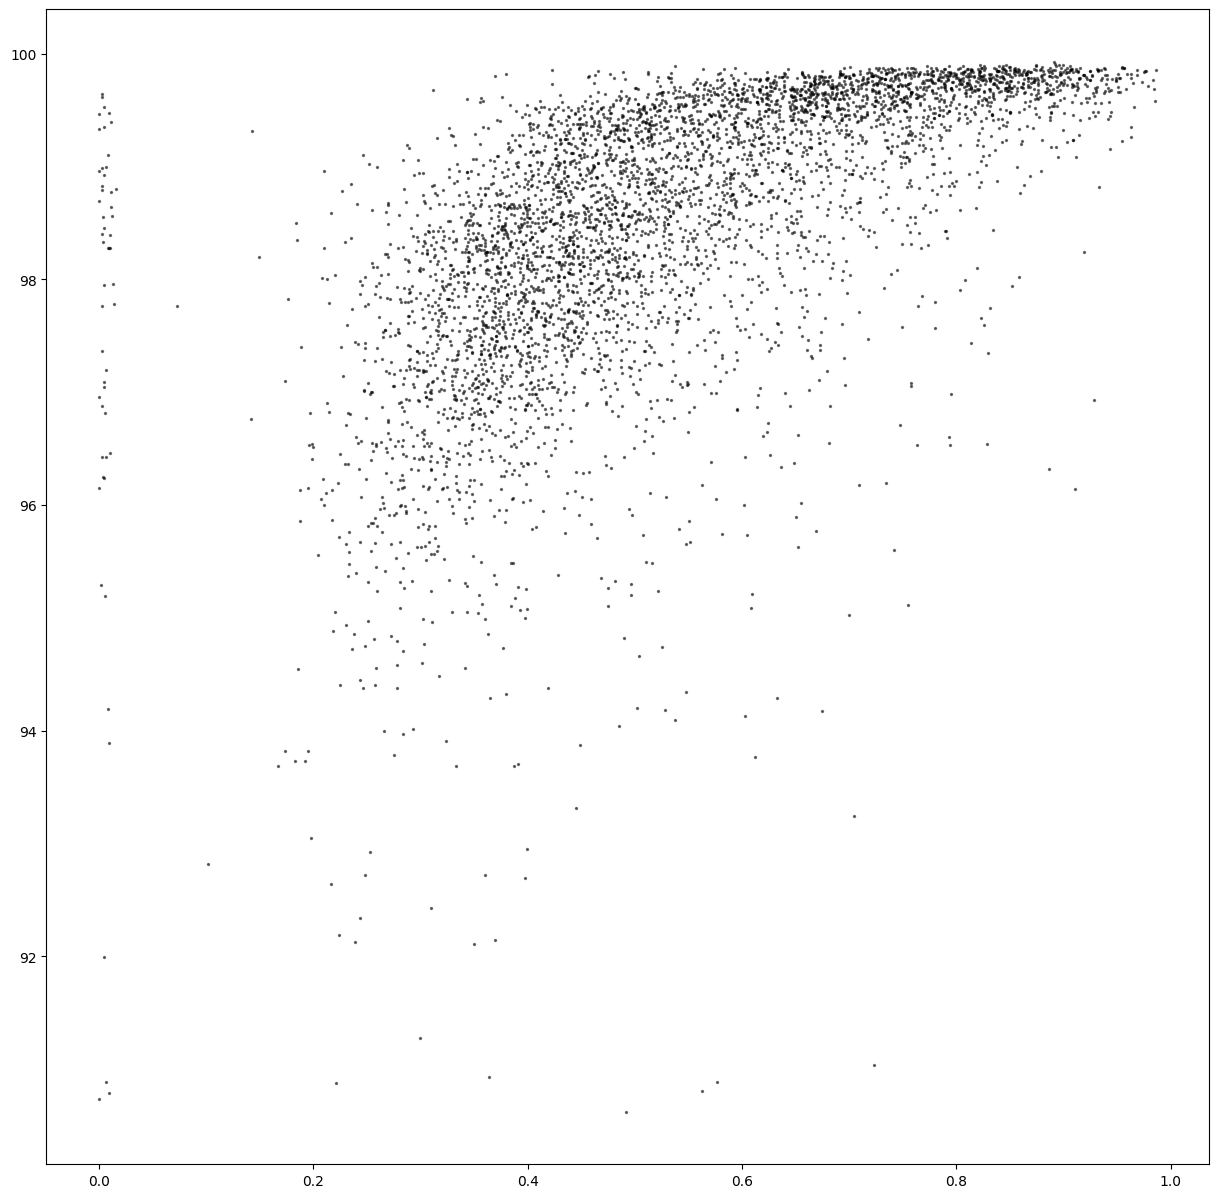

In [75]:
# 2 D Histogram of length vs width
X = All_H_Length
Y = All_H_Width
Z = All_GenCherenkovFraction

Finite_Mask = np.isfinite(X) & np.isfinite(Y)
X = X[Finite_Mask]
Y = Y[Finite_Mask]
Z = Z[Finite_Mask]



# plt.figure(figsize=[15,15])
# plt.scatter(X, Y, c=Z, s=2, cmap='Reds', vmin=80, vmax=100, alpha=Z/100)
# plt.colorbar(label='Gen Cherenkov Fraction (%)')
# plt.xlabel('Hillas Length')
# plt.ylabel('Hillas Width')
# # plt.xscale('log')

plt.figure(figsize=[15,15])
plt.scatter(Y/X,Z, s=2, c='black', alpha=0.5)

Spread = 0.42, alpha = -3.18, SDP_Theta = 0.74, Hillas alpha = 6.28
Spread = 0.83, alpha = -3.26, SDP_Theta = 1.01, Hillas alpha = 6.28
Spread = 2.62, alpha = 1.05, SDP_Theta = 1.35, Hillas alpha = 6.28
Spread = 1.83, alpha = -3.70, SDP_Theta = 2.32, Hillas alpha = 6.28
Spread = 1.23, alpha = -3.21, SDP_Theta = 0.57, Hillas alpha = 6.28
Spread = 0.80, alpha = 3.19, SDP_Theta = 0.71, Hillas alpha = 6.28
Spread = 2.99, alpha = -3.86, SDP_Theta = 0.74, Hillas alpha = 6.28
Spread = 2.13, alpha = 3.91, SDP_Theta = 1.35, Hillas alpha = 6.28
Spread = 0.72, alpha = -3.35, SDP_Theta = 2.48, Hillas alpha = 6.28
Spread = 0.77, alpha = -3.40, SDP_Theta = 0.65, Hillas alpha = 6.28


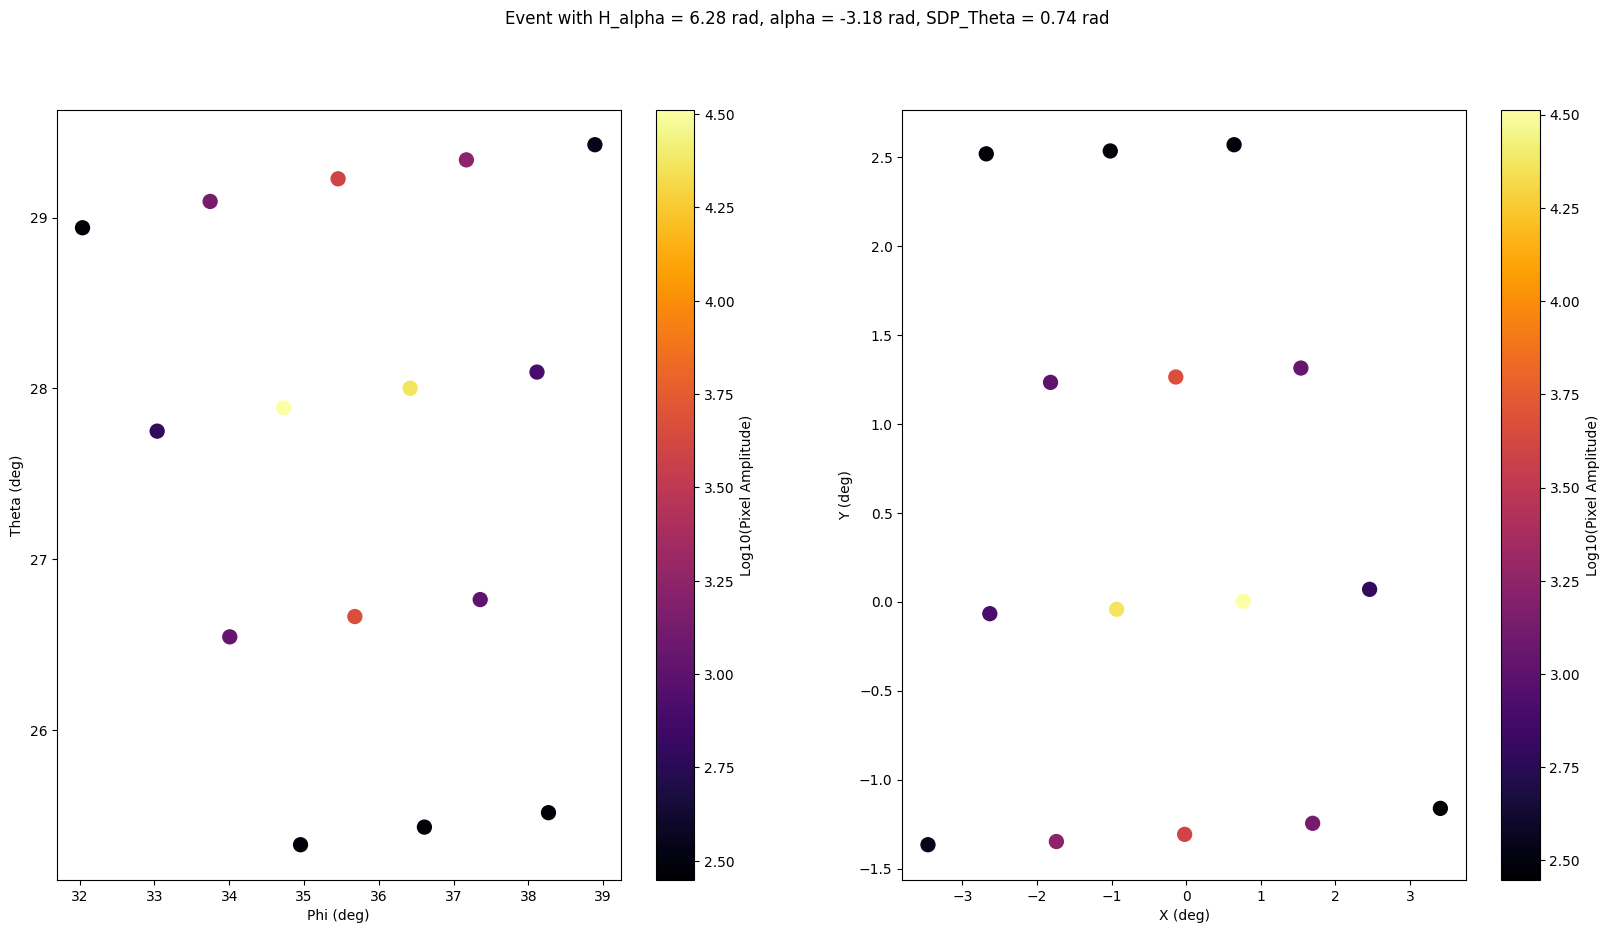

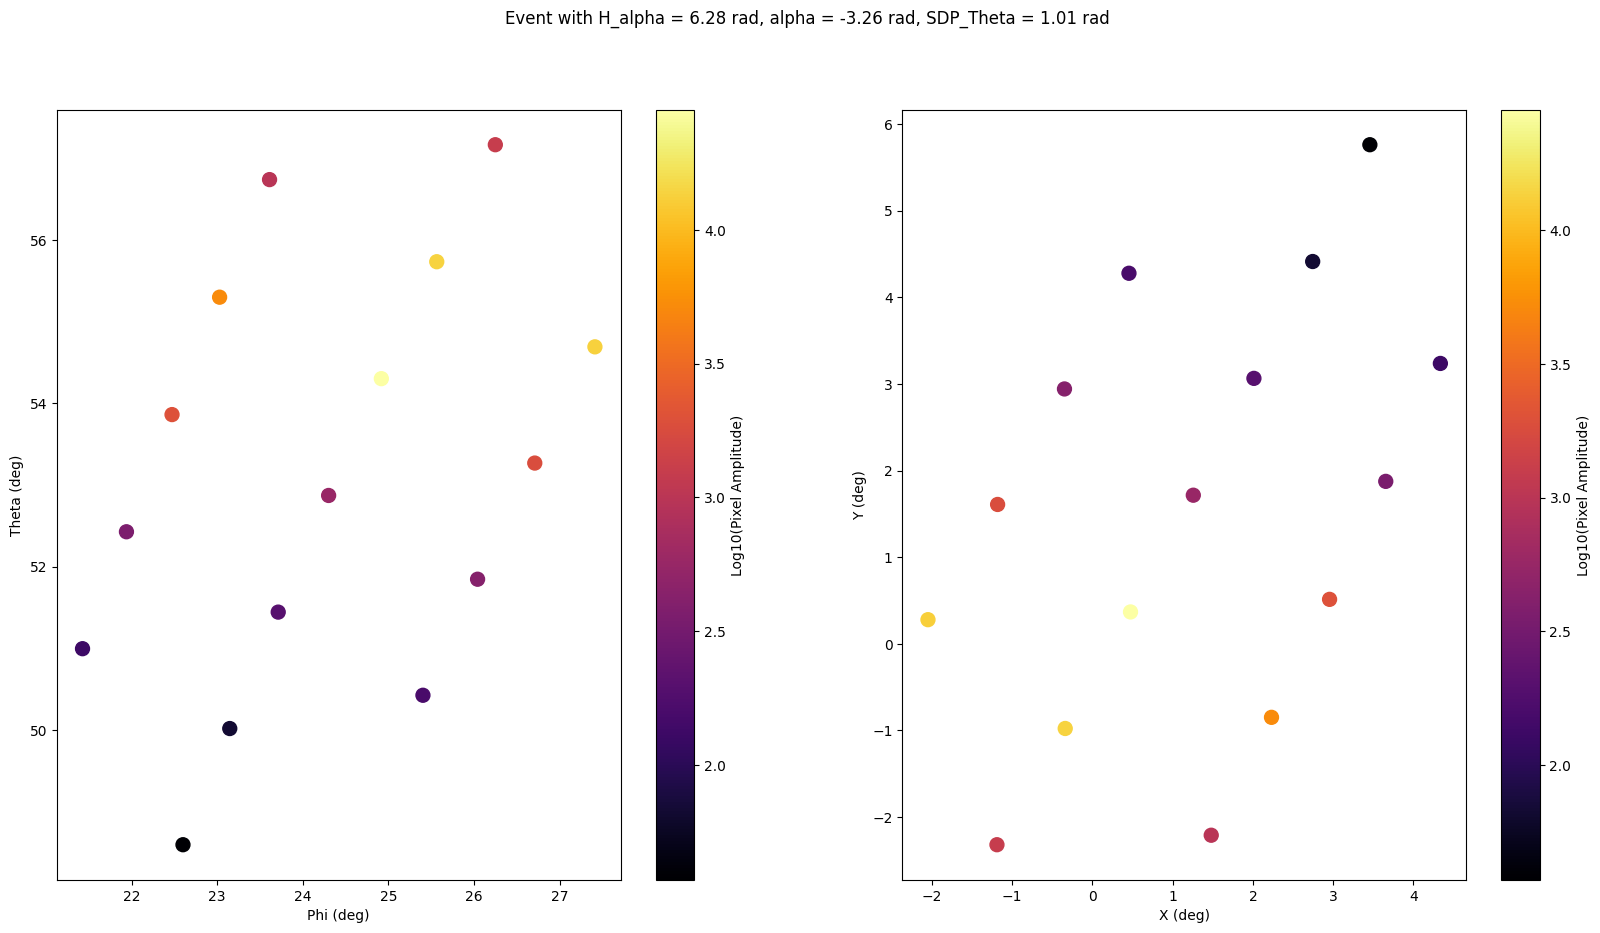

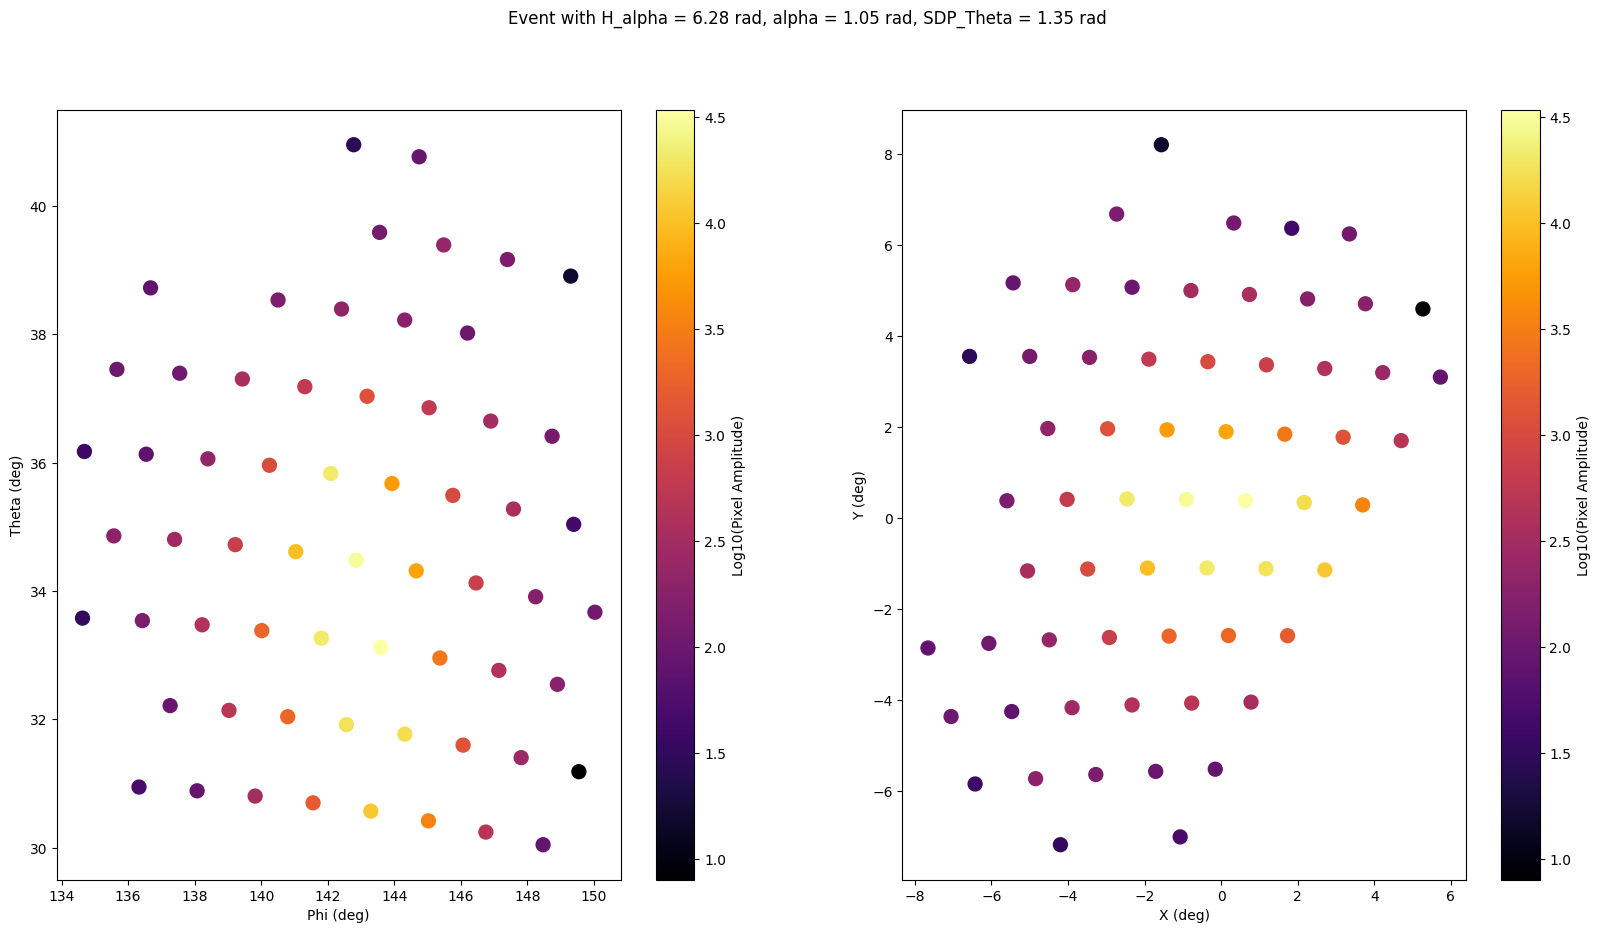

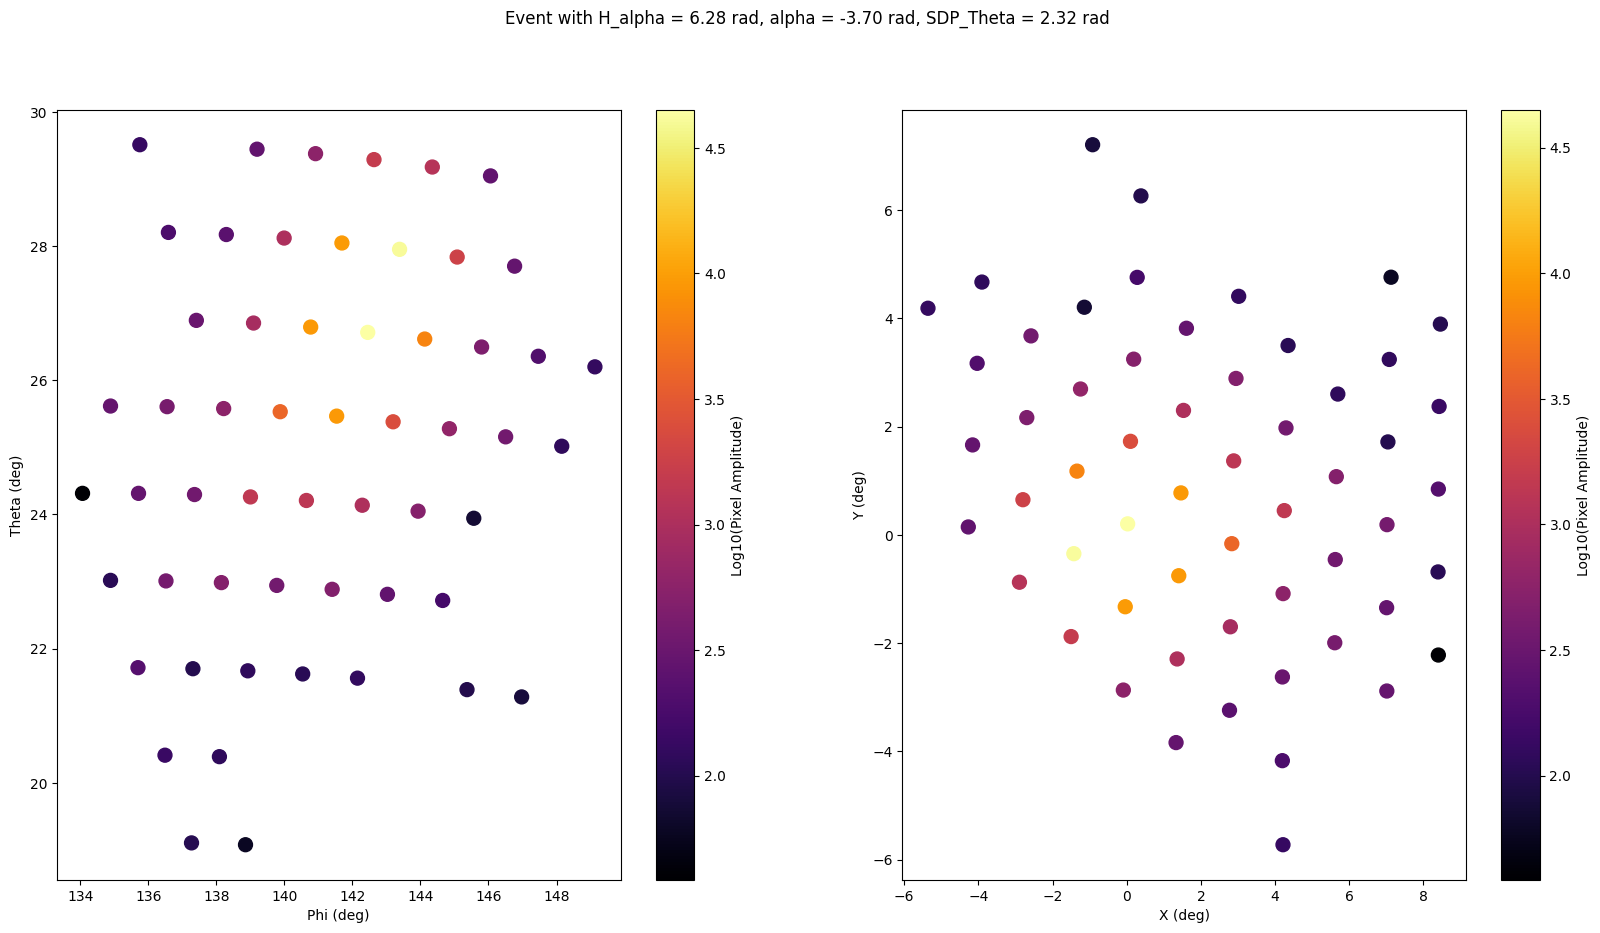

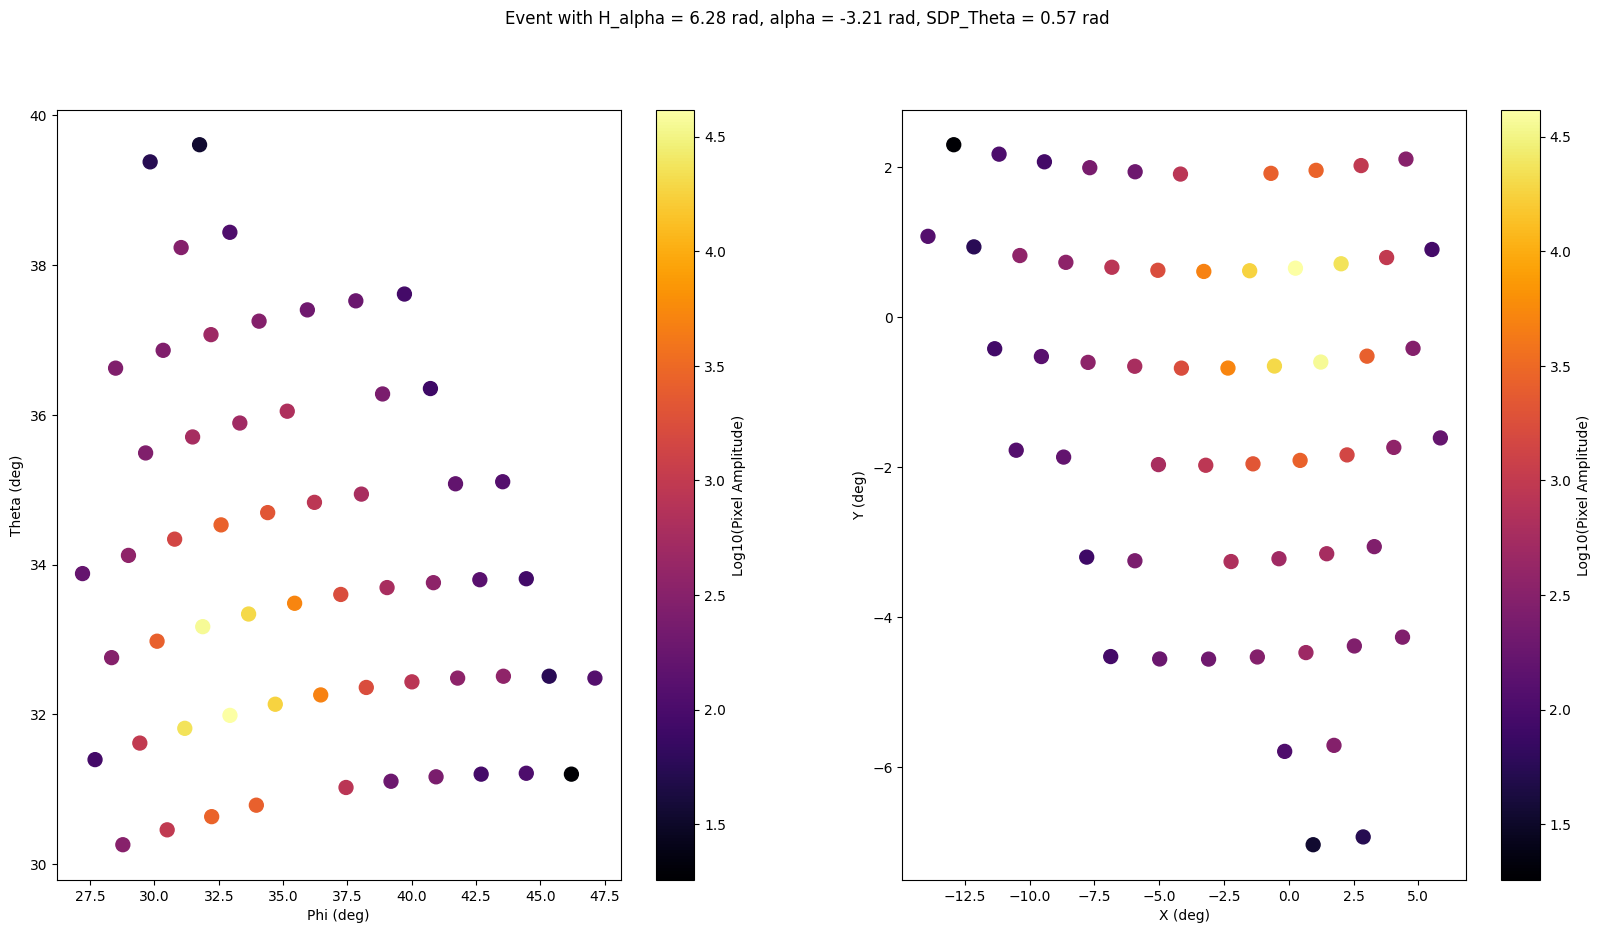

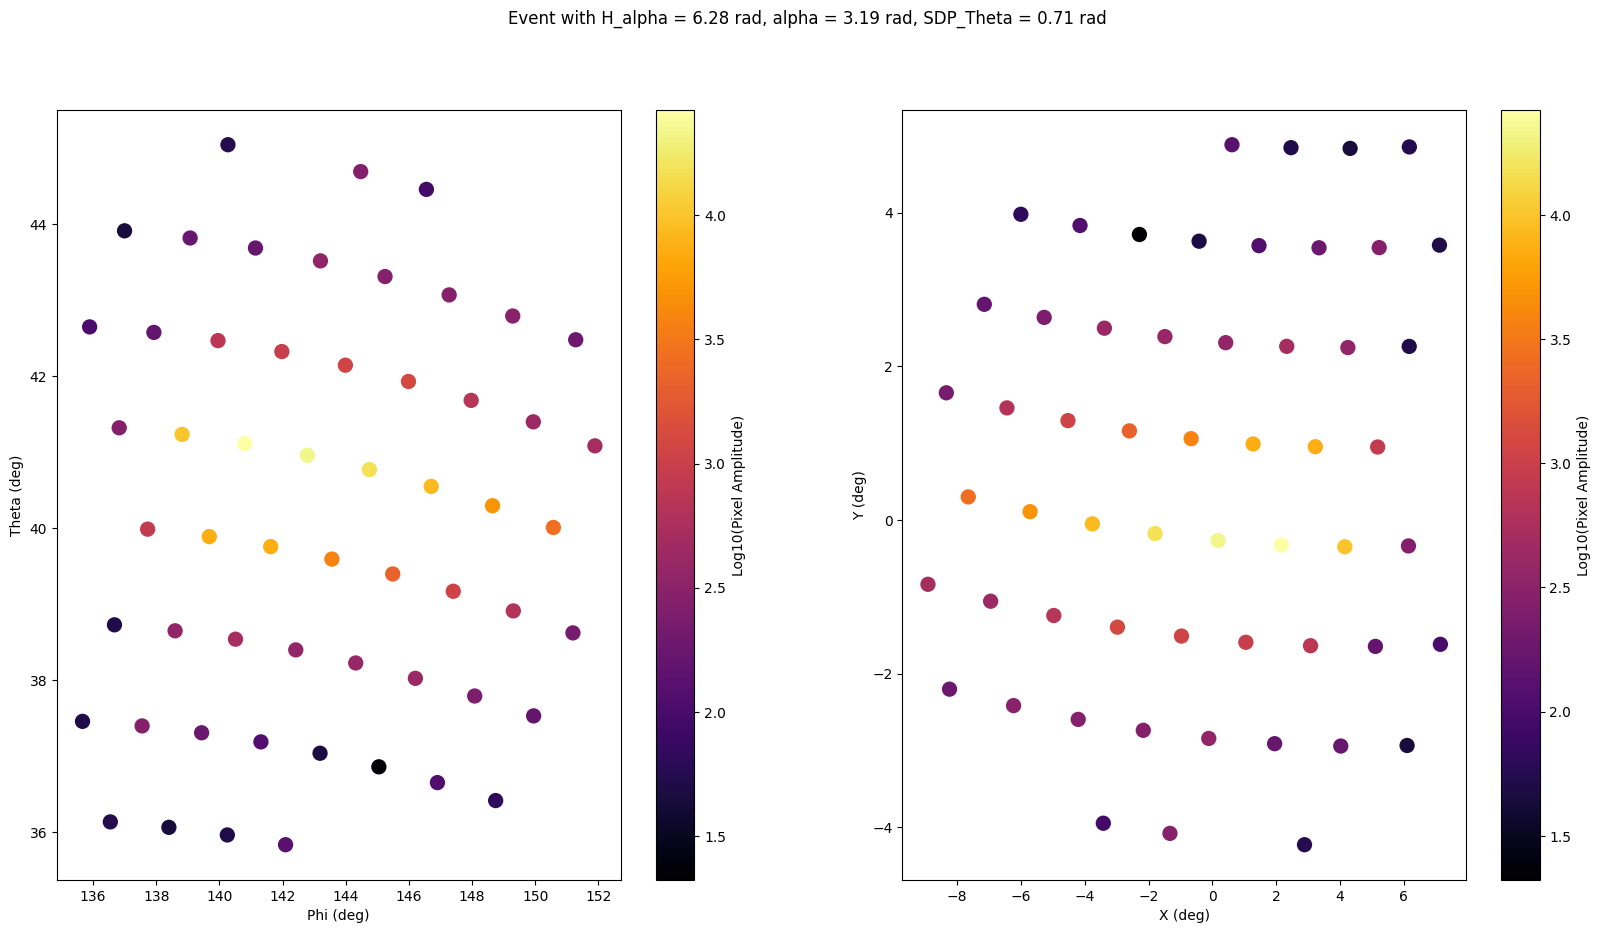

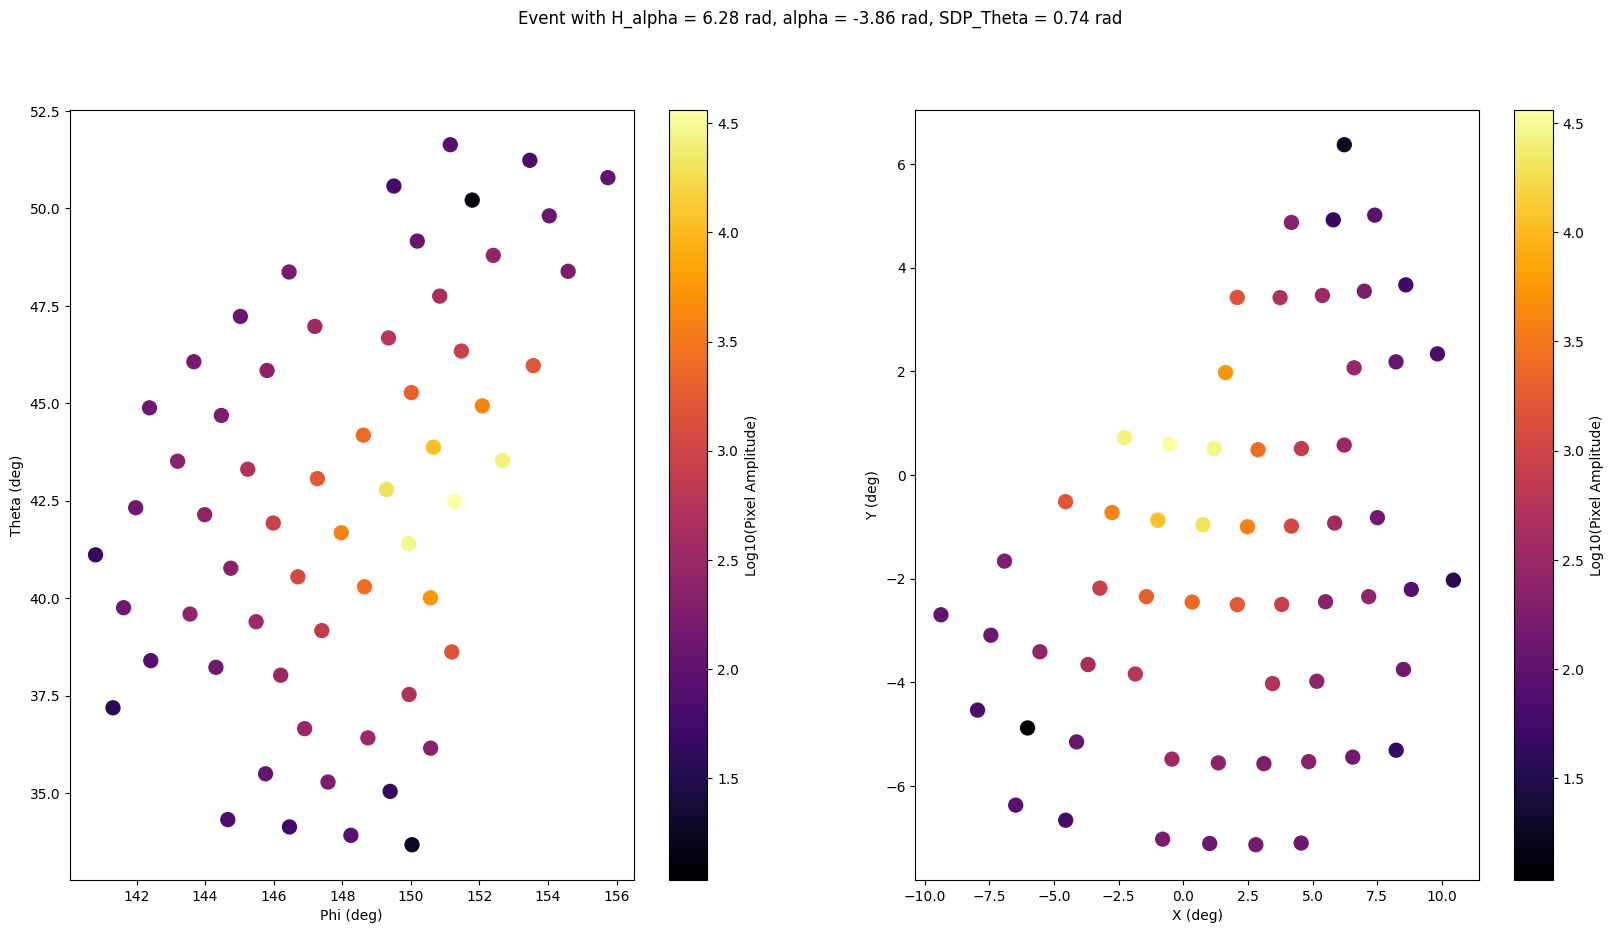

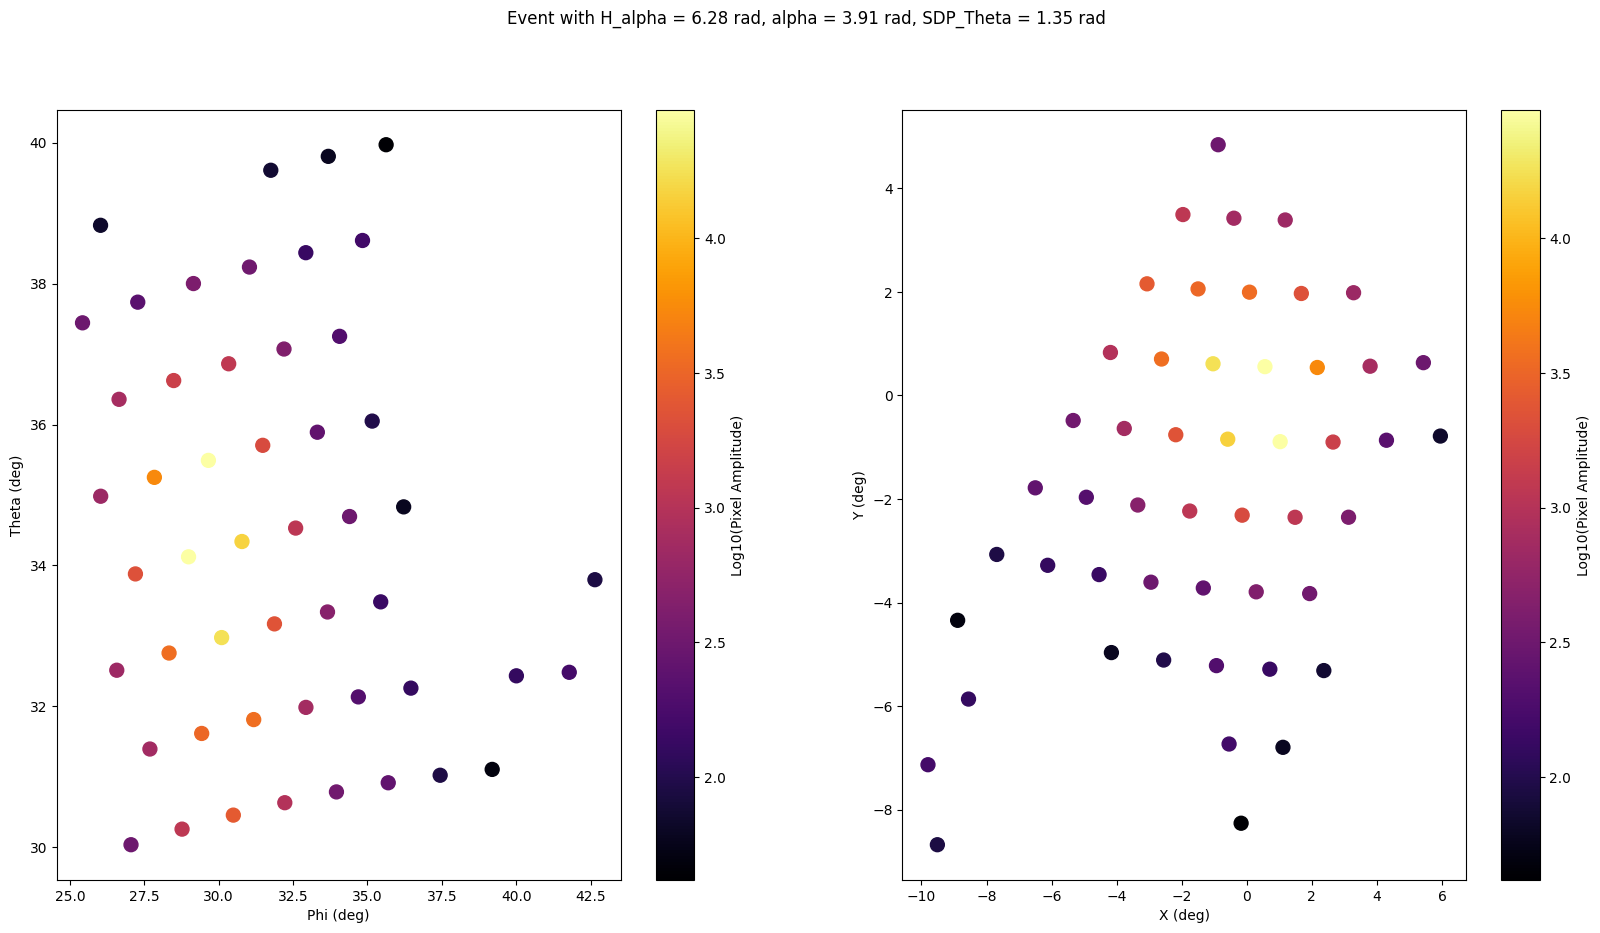

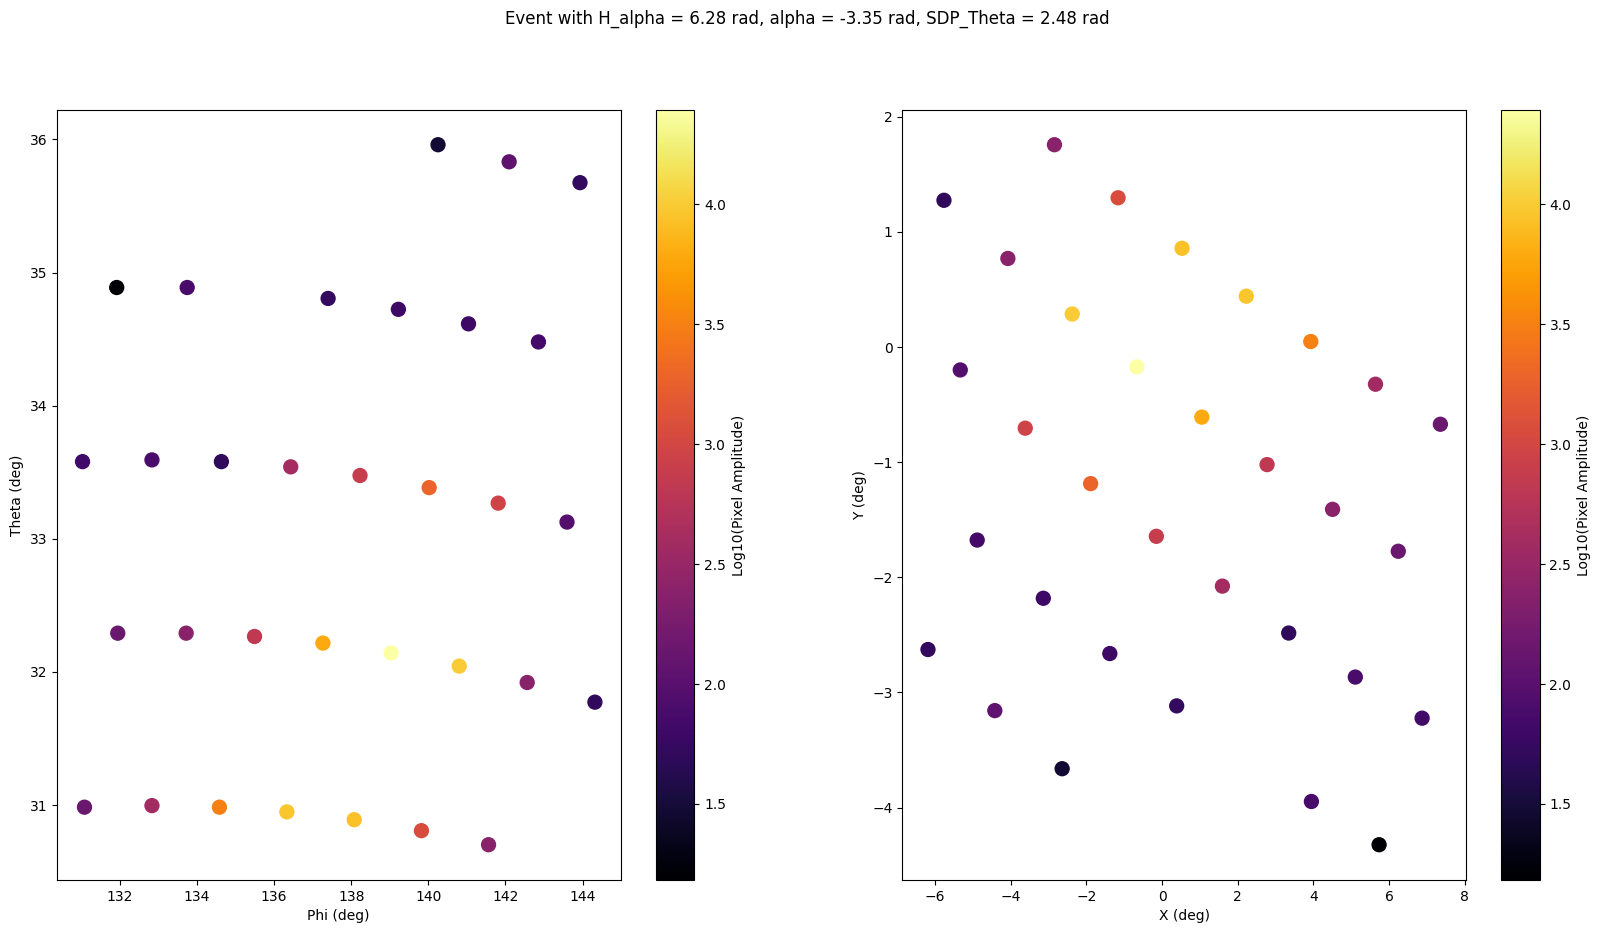

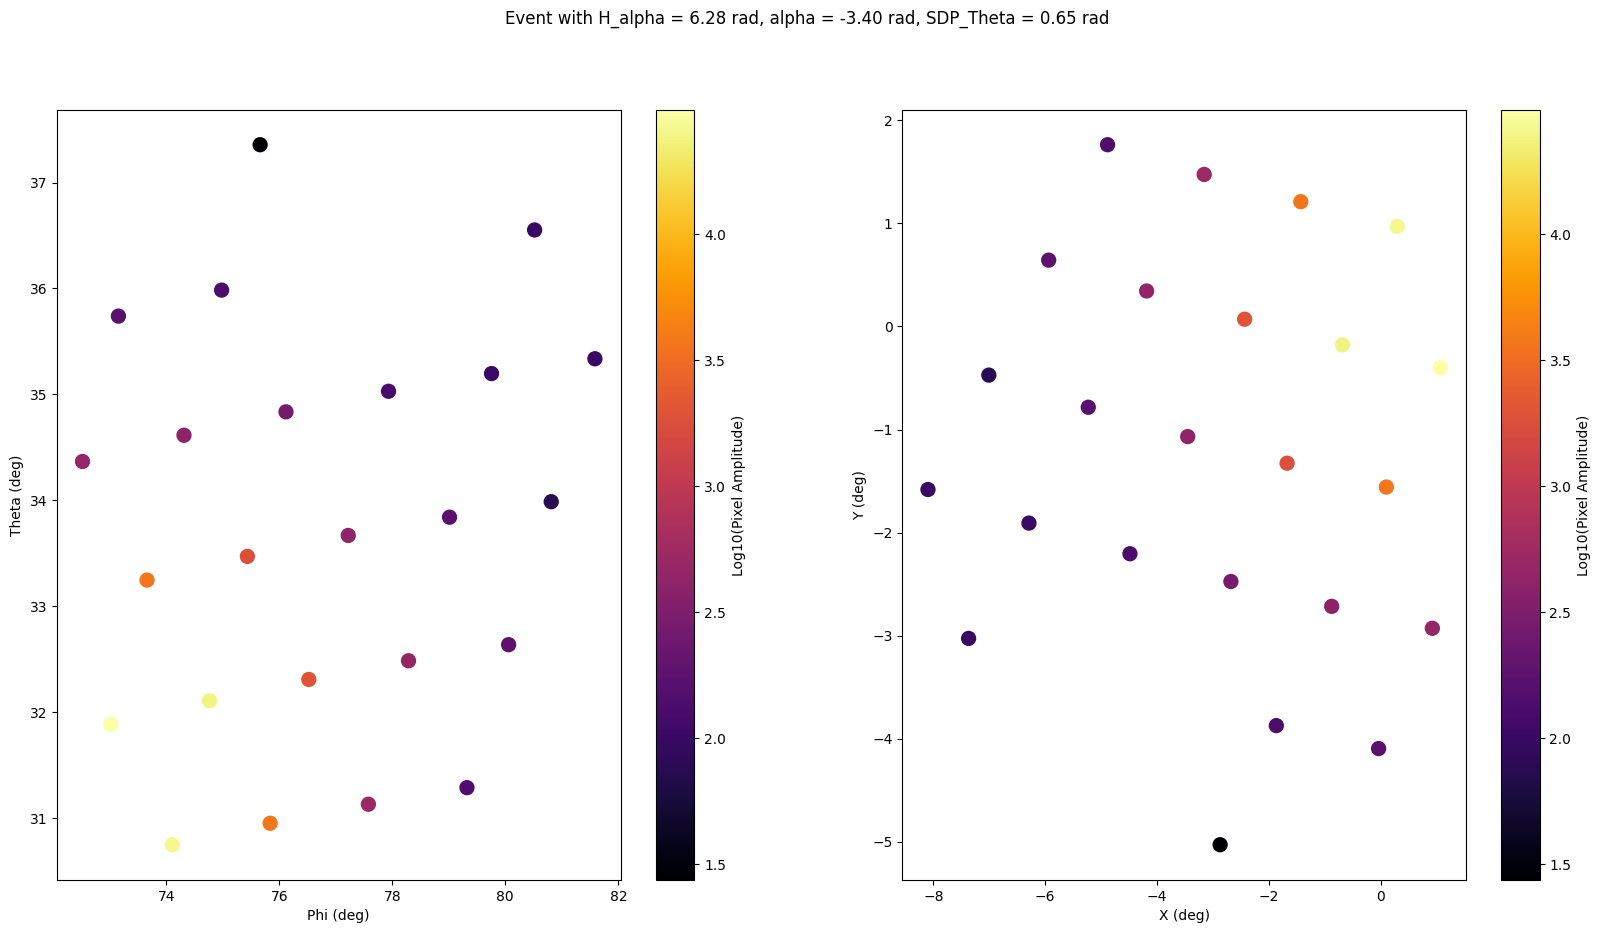

In [52]:
# # Alpha is not being computed properly, see what kind of events are causing this
# DoN = 10
# DoneN = 0
# for event in Data:
#     if event['HillasValues']['H_alpha'] < 6: continue

#     DoneN += 1
#     Pixel_Data = event['PixelData']

#     Triggered_Mask = event['MyyTrigger'].sum(axis=1)>0

#     pix_Amplitudes = np.log10(np.clip(np.sum(Pixel_Data['Trace']*event['MyyTrigger'], axis=1),a_min=1,a_max=np.inf))
#     pix_Phi = Pixel_Data['Phi']
#     pix_Theta = Pixel_Data['Theta']

#     fig, ax  = plt.subplots(1,2, figsize=[20,10])
#     # ax[0].scatter(pix_Phi[~Triggered_Mask], pix_Theta[~Triggered_Mask], c='gray', s=10, marker = 'x')
#     scat = ax[0].scatter(pix_Phi[Triggered_Mask], pix_Theta[Triggered_Mask], c=pix_Amplitudes[Triggered_Mask], s=100, cmap='inferno', marker = 'o')
#     plt.colorbar(scat, ax=ax[0], label='Log10(Pixel Amplitude)')
#     ax[0].set_xlabel('Phi (deg)')
#     ax[0].set_ylabel('Theta (deg)')



#     Pixel_Amplitudes = np.sum(Pixel_Data['Trace']*event['MyyTrigger'], axis=1).astype(float)
#     pix_X_Cam = Pixel_Data['Phi'][Triggered_Mask]
#     pix_Y_Cam = Pixel_Data['Theta'][Triggered_Mask]
#     Pixel_Amplitudes = Pixel_Amplitudes[Triggered_Mask]

#     pix_X_Cam_Mean = np.mean(pix_X_Cam*Pixel_Amplitudes) / np.mean(Pixel_Amplitudes)
#     pix_Y_Cam_Mean = np.mean(pix_Y_Cam*Pixel_Amplitudes) / np.mean(Pixel_Amplitudes)


#     # Transfrom the pix_X,Y_Cam to pix_X,Y
#     # Minimise the spread in Y
#     # X = cos(alpha)*(X_Cam - X_Cam_Mean) - sin(alpha)*(Y_Cam - Y_Cam_Mean)
#     # Y = sin(alpha)*(X_Cam - X_Cam_Mean) + cos(alpha)*(Y_Cam - Y_Cam_Mean)


#     def Y_Spread(alpha):
#         Y = np.sin(alpha)*(pix_X_Cam - pix_X_Cam_Mean) + np.cos(alpha)*(pix_Y_Cam - pix_Y_Cam_Mean)
#         spread = np.sum(Pixel_Amplitudes*(Y)**2) / np.sum(Pixel_Amplitudes)
#         return spread
    
#     SDP_Theta = event['Gen_SDPTheta']
#     res = minimize_scalar(Y_Spread, bounds=[-2*np.pi,2*np.pi], method='bounded',)
#     alpha = res.x
#     # res = minimize(Y_Spread, x0 = 0, bounds=[(-2 * np.pi, 2 * np.pi)], method='L-BFGS-B')
#     # alpha = res.x[0]
#     # print("initial Y ")
#     # print(np.sin(0)*(pix_X_Cam - pix_X_Cam_Mean) + np.cos(0)*(pix_Y_Cam - pix_Y_Cam_Mean))
#     # print("initial Pixel_Amplitudes")
#     # print(Pixel_Amplitudes)

#     print(f'Spread = {Y_Spread(0.1):.2f}, alpha = {alpha:.2f}, SDP_Theta = {SDP_Theta:.2f}, Hillas alpha = {event["HillasValues"]["H_alpha"]:.2f}')
#     X = np.cos(alpha)*(pix_X_Cam - pix_X_Cam_Mean) - np.sin(alpha)*(pix_Y_Cam - pix_Y_Cam_Mean)
#     Y = np.sin(alpha)*(pix_X_Cam - pix_X_Cam_Mean) + np.cos(alpha)*(pix_Y_Cam - pix_Y_Cam_Mean)
    
#     # Recompute with SDP_Theta instead of alpha
#     # X = np.cos(-SDP_Theta)*(pix_X_Cam - pix_X_Cam_Mean) - np.sin(-SDP_Theta)*(pix_Y_Cam - pix_Y_Cam_Mean)
#     # Y = np.sin(-SDP_Theta)*(pix_X_Cam - pix_X_Cam_Mean) + np.cos(-SDP_Theta)*(pix_Y_Cam - pix_Y_Cam_Mean)
    
#     # print(SDP_Theta, SDP_Theta, alpha)
#     # print(np.cos(-SDP_Theta), np.sin(-SDP_Theta))


#     scat = ax[1].scatter(X, Y, c=np.log10(np.clip(Pixel_Amplitudes,a_min = 1, a_max = np.inf)), s=100, cmap='inferno', marker = 'o')
#     plt.colorbar(scat, ax=ax[1], label='Log10(Pixel Amplitude)')
#     ax[1].set_xlabel('X (deg)')
#     ax[1].set_ylabel('Y (deg)')


#     plt.suptitle(f"Event with H_alpha = {event['HillasValues']['H_alpha']:.2f} rad, alpha = {alpha:.2f} rad, SDP_Theta = {SDP_Theta:.2f} rad")

#     if DoneN >= DoN: break


In [69]:
All_Pixel_Phi   = []
All_Pixel_Theta = []
for event in Data:
    PixelData  = event['PixelData']

    All_Pixel_Phi.extend(PixelData['Phi'])
    All_Pixel_Theta.extend(PixelData['Theta'])

    

(array([ 1780.,  3538.,  3639.,  4406.,  4181.,  4325.,  4504.,  5246.,
         4068.,  4193.,  5655.,  5210.,  6211.,  7140.,  8251., 10374.,
        11154., 12367., 11710., 11806., 12746., 12493., 12226., 12299.,
        11601., 12111., 13319., 11623., 12886., 12570., 13013., 11748.,
        12107., 12482.,  9399.,  7945.,  6950.,  6464.,  6666.,  7506.,
         7960., 11268., 10048., 10012., 10475., 10090.,  9831.,  9164.,
         9116.,  7873.,  9190.,  7603.,  7961.,  7883.,  8446.,  8569.,
         8047.,  7971.,  7871.,  6851.,  6093.,  5421.,  5149.,  5363.,
         6173.,  6028.,  7808.,  7145.,  7871.,  8191.,  8708.,  8411.,
         9333.,  6671.,  9352.,  9986.,  8896.,  9649.,  9148.,  9139.,
         8889.,  7305.,  7980.,  5785.,  4544.,  4018.,  3131.,  3150.,
         2877.,  2722.,  2546.,  3002.,  3356.,  2642.,  2853.,  2826.,
         2852.,  2458.,  1919.,  1010.]),
 array([ -2.02443004,  -0.18940577,   1.64561856,   3.4806428 ,
          5.31566715,   7.1506

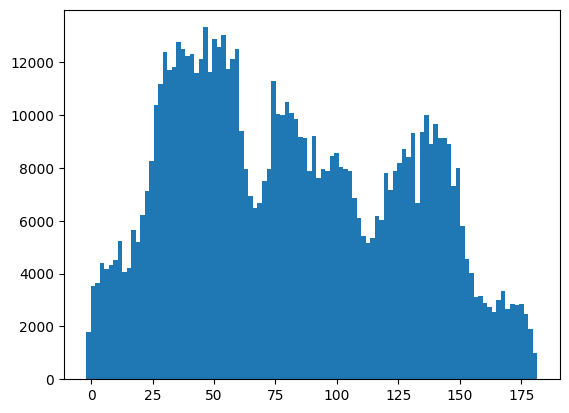

In [70]:
plt.figure()
plt.hist(All_Pixel_Phi, bins=100)